# PATEL SMITKUMAR KAUSHIKKUMAR (CIN 306587208)
# CS 5661 : Homework 1


## Deep Convolutional Neural Networks (CNN) with Keras + TensorFlow

####  Write and submit your python codes in “Jupyter Notebook” to perform the following tasks.Make sure to provide proper descriptions as MarkDown for each section of your code.

### Fashion Image Recognition using Deep Convolutional Neural Networks:
------------------------------------------------------------------------------------------------------------------------

#### In this question, we try to improve the accuracy of the Fashion Image Recognition system that we developed in the class in Lab5. Download and open the Lab5 ipython tutorial file (it is on CSNS under Lectures). Add the following lines on the top of your code to fix random seed for reproducibility:
- import numpy as np
- np.random.seed(0)

#### Now, Modify the CNN structure and parameters to increase the testing accuracy as much as youcan, but I expect At LEAST 92% Accuracy on the TESTING Set.

####  I want you to be creative and use all knowledge you have gained from this class to improve the results (don’t change the dataset, you can only change the CNN structure or learning parameters). Here are some ideas that you may want to use:

- 1- Changing the structure or parameters of the CNN including all layers (Conv Layers, Poolinglayers, Dropout Layers, Fully Connected Layers, …).
- 2- Making the Network more complex (when it is underfit), or less complex (when it isoverfit).
- 3- Improve the training process (e.g. changing the epochs, changing the optimization or loss)

#### Please Notice:
- I- Of course there are infinite number ways to change the code to improve the results. Thus, I expect to receive a Unique code from each student.
- II- You need to do a lot of Trial & Error. That is why I decided to use the Fashion Dataset since it includes small grayscale images, and everyone can process that on personal laptops. However, make sure to start early enough!
- III- One student, who achieves the highest accuracy in the class (the winning student), will get 10% bonus on the overall grade of the course!

In [1]:
import numpy as np
np.random.seed(0)

In [2]:
# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils

import numpy as np

Using TensorFlow backend.


## Let's use the Fashion-MNIST Dataset including 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images:

0:	T-shirt/top, 
1:	Trouser,
2:	Pullover,
3:	Dress,
4:	Coat,
5:	Sandal,
6:	Shirt,
7:	Sneaker,
8:	Bag,
9:	Ankle boot 

In [3]:
# Keras will download MNIST dataset for us:
from keras.datasets import fashion_mnist
 
# By default, the first 60k of MNIST has been defined as training and the rest as testing set: 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


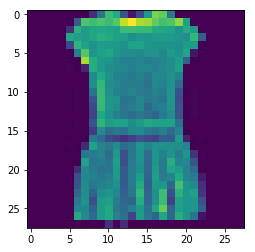

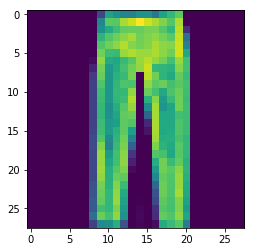

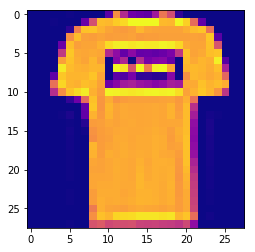

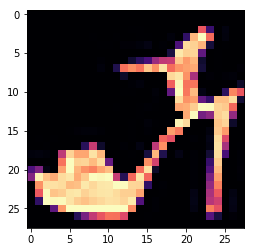

In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[3,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[16,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap='plasma')
plt.show()
imgplot = plt.imshow(X_train[9,:,:],cmap='magma')
plt.show()

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
# simply normalize the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
# output label:
print (y_train.shape)
print (y_train[:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [10]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [11]:
# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Define the Network Architecture (model):

In [12]:
# Declare Sequential model fro our network:
model = Sequential()

In [13]:
# CNN first layer (with 32 3x3 filter):
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
print(model.output_shape) # -> (None, 26, 26, 32)

# If your image batch is of N images of HxW size with C channels: 
# theano uses the NCHW ordering while tensorflow uses the NHWC ordering.

Instructions for updating:
Colocations handled automatically by placer.
(None, 26, 26, 32)


In [14]:
# more hidden layers:
model.add(Convolution2D(32, (3, 3), activation='relu'))
print(model.output_shape)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.25)) 


(None, 24, 24, 32)
(None, 12, 12, 32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.output_shape)

(None, 4608)
(None, 128)
(None, 10)


## Compile the model:
#### We need to compile the model and then it will be ready to train it:

In [16]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')
# more info about loss functions: https://keras.io/losses
# more infor about Optimizers: https://keras.io/optimizers

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## Training:

In [22]:
# history = model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)
history = model.fit(X_train, y_train, validation_split=0.25, batch_size=40, epochs=15, verbose=1)

# batch_size: Integer or None. Number of samples per gradient update. 
# epochs: Number of iteration over the entire x and y data provided. 
# verbose: 0, 1, or 2. how want to see the training progress. 0 = silent, 1 = progress bar, 2 = one line per epoch.
# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. 
# You can add some callbacks to get a view on internal states and statistics of the model during training:
# https://keras.io/callbacks/     

Train on 45000 samples, validate on 15000 samples
Epoch 1/15
45000/45000 [==============================] - 186s 4ms/step - loss: 0.2031 - acc: 0.9292 - val_loss: 0.2305 - val_acc: 0.9201
Epoch 2/15
45000/45000 [==============================] - 172s 4ms/step - loss: 0.1868 - acc: 0.9346 - val_loss: 0.2385 - val_acc: 0.9139
Epoch 3/15
45000/45000 [==============================] - 168s 4ms/step - loss: 0.1720 - acc: 0.9377 - val_loss: 0.2275 - val_acc: 0.9229
Epoch 4/15
45000/45000 [==============================] - 168s 4ms/step - loss: 0.1655 - acc: 0.9391 - val_loss: 0.2211 - val_acc: 0.9243
Epoch 5/15
45000/45000 [==============================] - 172s 4ms/step - loss: 0.1520 - acc: 0.9437 - val_loss: 0.2271 - val_acc: 0.9259
Epoch 6/15
45000/45000 [==============================] - 163s 4ms/step - loss: 0.1467 - acc: 0.9452 - val_loss: 0.2283 - val_acc: 0.9265
Epoch 7/15
45000/45000 [==============================] - 168s 4ms/step - loss: 0.1422 - acc: 0.9464 - val_loss: 0.2332 - 

In [23]:
# Training with Validation:
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=2)
# fitted_model = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=15, verbose=1)

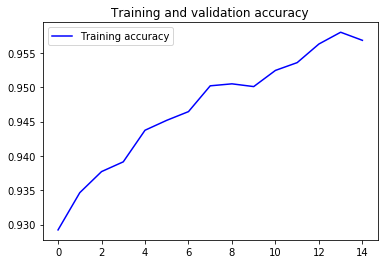

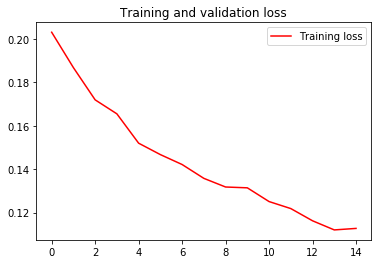

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = history.history['acc']
#val_accuracy = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

## Testing:

In [25]:
predicted_classes = model.predict_classes(X_test)

In [26]:
# Testing:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

10000/10000 [==============================] - 5s 530us/step
The accuracy is:  0.9226
